# Confidence intervals for model parameters:
The bootstrap resampling method can be used as a nonparametric method for
calculating condence intervals, nominally called bootstrap condence intervals. The bootstrap
is a simulated Monte Carlo method where samples are drawn from a xed nite dataset with
replacement and a parameter is estimated on each sample. This procedure leads to a robust
estimate of the true population parameter via sampling. <p>
The procedure can be used to estimate the skill of a predictive model by tting the model on
each sample and evaluating the skill of the model on those samples not included in the sample.
The mean or median skill of the model can then be presented as an estimate of the model skill
when evaluated on unseen data. Condence intervals can be added to this estimate by selecting
observations from the sample of skill scores at specic percentiles. <p>

statistics = [] <p>
for i in bootstraps: <p>
    sample = select_sample_with_replacement(data) <p>
    stat = calculate_statistic(sample) <p>
    statistics.append(stat) 

In [1]:
# bootstrap confidence intervals
from numpy.random import seed, rand, randint
from numpy import mean, median, percentile

# seed the random number generator
seed(1)
# generate dataset
dataset = 0.5 + rand(1000) * 0.5

from matplotlib import pyplot

pyplot.hist(dataset)
pyplot.show()


<Figure size 640x480 with 1 Axes>

In [2]:
# bootstrap
scores = list()
for _ in range(100):
    # bootstrap sample
    indices = randint(0, 1000, 1000)
    sample = dataset[indices]
    #print('sample size:', len(sample))
    # calculate and store statistic
    statistic = mean(sample)
    scores.append(statistic)

## Size of the bootstraped samples = whole dataset size; lo que pasa es que hay repetición de puntos

In [3]:
print('mean of the population = %.3f' % mean(dataset))
print('50th percentile (median) of the bootstrap samples means = %.3f' % median(scores))


mean of the population = 0.750
50th percentile (median) of the bootstrap samples means = 0.750


In [4]:
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
# retrieve observation at lower percentile
lower = max(0.0, percentile(scores, lower_p))
print('%.1fth percentile = %.3f' % (lower_p, lower))
# calculate upper percentile (e.g. 97.5)
upper_p = (100 - alpha) + (alpha / 2.0)
# retrieve observation at upper percentile
upper = min(1.0, percentile(scores, upper_p))
print('%.1fth percentile = %.3f' % (upper_p, upper))


2.5th percentile = 0.741
97.5th percentile = 0.757


Hasta aquí tenemos un ejemplo de obtención de la estimación de un parámetro (en este caso el valor medio de una 
población) a partir del resampleo (mediante bootstrapping) de los datos, estimado como el valor medio de las medias 
de dichas muestras <p>
Ahora vamos a aplicar este método para estimar, en lugar de la media de una población, los coeficientes de una
regresión

### Generación del dataset:

x: mean=100.776 stdv=19.620
y: mean=151.050 stdv=22.358


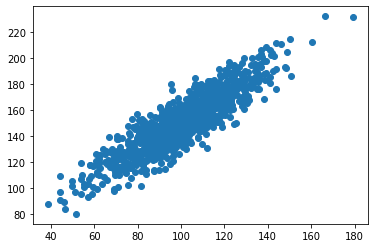

In [5]:
from numpy.random import randn
from numpy import std
from scipy.stats import linregress
# seed random number generator
seed(1)
# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# summarize
print('x: mean=%.3f stdv=%.3f' % (mean(x), std(x)))
print('y: mean=%.3f stdv=%.3f' % (mean(y), std(y)))
# plot
pyplot.scatter(x, y)
pyplot.show()


In [6]:
import numpy as np 

regression_scores = list()
for _ in range(100):
    # bootstrap sample
    indices = randint(0, 1000, 500)
    x_sample = x[indices]
    y_sample = y[indices]
    
    # simple linear regression model
    b1_sample, b0_sample, r_value, p_value, std_err = linregress(x_sample, y_sample)
    regression_scores.append([b1_sample, b0_sample])

b0_scores = np.array(regression_scores)[:, 1]
b1_scores = np.array(regression_scores)[:, 0]


In [7]:
print('b0 50th percentile (median) = %.3f' % median(b0_scores))
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
# retrieve observation at lower percentile
b0_lower = max(0.0, percentile(b0_scores, lower_p))
print('%.1fth percentile = %.3f' % (lower_p, b0_lower))
# calculate upper percentile (e.g. 97.5)
upper_p = (100 - alpha) + (alpha / 2.0)
# retrieve observation at upper percentile
b0_upper = min(1.0, percentile(b0_scores, upper_p))
print('%.1fth percentile = %.3f' % (upper_p, b0_upper))



#PLOTEAR REGRESOR DE TODA LA POBLACIÓN VS EL ONTENIDO CON BOOTSTRAP


b0 50th percentile (median) = 48.939
2.5th percentile = 44.529
97.5th percentile = 1.000


In [16]:
print('b0 50th percentile (median) = %.3f' % median(b0_scores))
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
# retrieve observation at lower percentile
#b0_lower = max(0.0, percentile(b0_scores, lower_p))
perc_5th = percentile(b0_scores, lower_p)
#print('%.1fth percentile = %.3f' % (lower_p, b0_lower))
# calculate upper percentile (e.g. 97.5)
upper_p = 100 - (alpha / 2.0)
# retrieve observation at upper percentile
#b0_upper = min(1.0, percentile(b0_scores, upper_p))
perc_95th = percentile(b0_scores, upper_p)
#print('%.1fth percentile = %.3f' % (upper_p, b0_upper))
print('confidence interval: ', [perc_5th.round(2), perc_95th.round(2)])


#PLOTEAR REGRESOR DE TODA LA POBLACIÓN VS EL ONTENIDO CON BOOTSTRAP


b0 50th percentile (median) = 48.939
confidence interval:  [44.53, 53.61]


In [18]:
print('b0 50th percentile (median) = %.3f' % median(b0_scores))
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
# retrieve observation at lower percentile
#b0_lower = max(0.0, percentile(b0_scores, lower_p))
perc_5th = percentile(b0_scores, lower_p)
#print('%.1fth percentile = %.3f' % (lower_p, b0_lower))
# calculate upper percentile (e.g. 97.5)
upper_p = 100 - (alpha / 2.0)
# retrieve observation at upper percentile
#b0_upper = min(1.0, percentile(b0_scores, upper_p))
perc_95th = percentile(b0_scores, upper_p)
#print('%.1fth percentile = %.3f' % (upper_p, b0_upper))
print('confidence interval: ', [perc_5th.round(2), perc_95th.round(2)])
print('b0 estimate: ', [perc_5th.round(2), median(b0_scores).round(2), perc_95th.round(2)])

#PLOTEAR REGRESOR DE TODA LA POBLACIÓN VS EL ONTENIDO CON BOOTSTRAP


b0 50th percentile (median) = 48.939
confidence interval:  [44.53, 53.61]
b0 estimate:  [44.53, 48.94, 53.61]


In [19]:
b0_estimate = median(b0_scores)
print('b0 50th percentile (median) = %.3f' % median(b0_scores))
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
# retrieve observation at lower percentile
#b0_lower = max(0.0, percentile(b0_scores, lower_p))
perc_5th = percentile(b0_scores, lower_p)
#print('%.1fth percentile = %.3f' % (lower_p, b0_lower))
# calculate upper percentile (e.g. 97.5)
upper_p = 100 - (alpha / 2.0)
# retrieve observation at upper percentile
#b0_upper = min(1.0, percentile(b0_scores, upper_p))
perc_95th = percentile(b0_scores, upper_p)
#print('%.1fth percentile = %.3f' % (upper_p, b0_upper))
print('confidence interval: ', [perc_5th.round(2), perc_95th.round(2)])
print('b0 estimate: ', [perc_5th.round(2), b0_estimate.round(2), perc_95th.round(2)])

#PLOTEAR REGRESOR DE TODA LA POBLACIÓN VS EL ONTENIDO CON BOOTSTRAP


b0 50th percentile (median) = 48.939
confidence interval:  [44.53, 53.61]
b0 estimate:  [44.53, 48.94, 53.61]


In [20]:
b1_estimate = median(b1_scores)
print('b1 50th percentile (median) = %.3f' % median(b1_scores))
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
# retrieve observation at lower percentile
#b1_lower = max(0.0, percentile(b1_scores, lower_p))
perc_5th = percentile(b1_scores, lower_p)
#print('%.1fth percentile = %.3f' % (lower_p, b1_lower))
# calculate upper percentile (e.g. 97.5)
upper_p = 100 - (alpha / 2.0)
# retrieve observation at upper percentile
#b1_upper = min(1.0, percentile(b1_scores, upper_p))
perc_95th = percentile(b1_scores, upper_p)
#print('%.1fth percentile = %.3f' % (upper_p, b1_upper))
print('confidence interval: ', [perc_5th.round(2), perc_95th.round(2)])
print('b1 estimate: ', [perc_5th.round(2), b1_estimate.round(2), perc_95th.round(2)])


#PLOTEAR REGRESOR DE TODA LA POBLACIÓN VS EL ONTENIDO CON BOOTSTRAP


b1 50th percentile (median) = 1.013
confidence interval:  [0.97, 1.06]
b1 estimate:  [0.97, 1.01, 1.06]


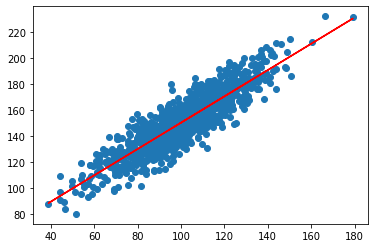

In [22]:
# make prediction
yhat = b0_estimate + b1_estimate * x
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='r')
pyplot.show()

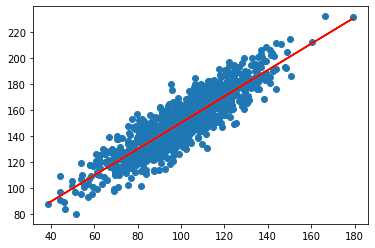

In [23]:
# make prediction
b1, b0, r_value, p_value, std_err = linregress(x, y)

yhat_whole_ds = b0 + b1 * x
yhat_bootstrapped = b0_estimate + b1_estimate * x
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat_whole_ds, color='y')
pyplot.plot(x, yhat_bootstrapped, color='r')
pyplot.show()


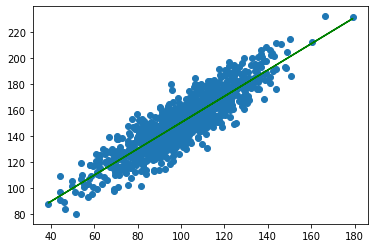

In [24]:
# make prediction
b1, b0, r_value, p_value, std_err = linregress(x, y)

yhat_whole_ds = b0 + b1 * x
yhat_bootstrapped = b0_estimate + b1_estimate * x
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat_whole_ds, color='g')
#pyplot.plot(x, yhat_bootstrapped, color='r')
pyplot.show()



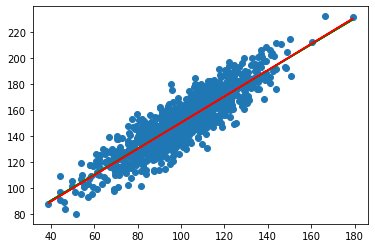

In [26]:
# make prediction
b1, b0, r_value, p_value, std_err = linregress(x[:300], y[:300])

yhat_whole_ds = b0 + b1 * x
yhat_bootstrapped = b0_estimate + b1_estimate * x
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat_whole_ds, color='g')
pyplot.plot(x, yhat_bootstrapped, color='r')
pyplot.show()



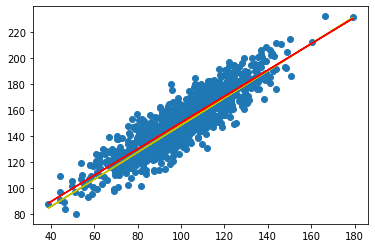

In [28]:
# make prediction
b1, b0, r_value, p_value, std_err = linregress(x[:30], y[:30])

yhat_whole_ds = b0 + b1 * x
yhat_bootstrapped = b0_estimate + b1_estimate * x
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat_whole_ds, color='y')
pyplot.plot(x, yhat_bootstrapped, color='r')
pyplot.show()

